# Solution
# (7) Practice Learning Activity: Monitor and improve Virtual Agent performance through user satisfaction ratings and feedback
##### (GenAI Life Cycle Phase 7: Monitoring and Improvement self-practice)
---

1. Load the file provided which contains the exported Welp Virtual Agent feedback records from a MySQL database. We then display the head of the dataset for our initial inspection.

In [ ]:
import pandas as pd

# Load CSV file into a pandas DataFrame
csv_path = "~/Documents/GitHub/capstone-ailtk/ailtk_case-navigation-module/case-files/ailtk_welp_feedback.csv"
df = pd.read_csv(csv_path)

# Preview the dataset
print(df.head())


   id                                     prompt  \
0   1  What's a hot eating spot you'd recommend?   
1   2  What's a hot eating spot you'd recommend?   
2   3   Do you have details about Zark's Burgers   
3   4                    Where is Zark's Burgers   
4   5                    Where is Zark's Burgers   

                                            response feedback_type  \
0  <p>Hey there!  Looking for a hot spot to eat, ...     thumbs-up   
1  <p>Hey there!  Looking for a hot spot to eat? ...     thumbs-up   
2  <p>I'm sorry, I don't have any information abo...   thumbs-down   
3  <p>I'm sorry, but I don't have the location of...   thumbs-down   
4  <p>I'm sorry, I don't have the information nee...   thumbs-down   

                                 additional_feedback           created_at  
0                                                NaN  2025-02-27 13:31:30  
1                                                NaN  2025-02-27 13:31:46  
2  Zark's is the hottest new restauran

2. We make a wordcloud to get an initial overview of the column `prompt`. This helps as to give an idea what users are asking the Virtual Agent.

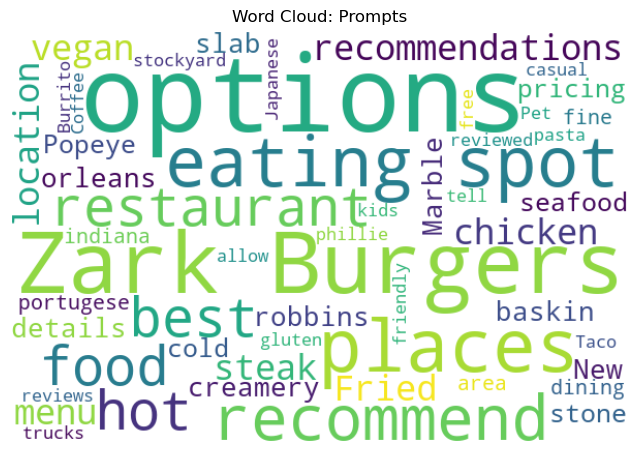

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ---- WORD CLOUD: PROMPTS ----
plt.figure(figsize=(8, 6))
prompt_text = " ".join(df["prompt"].dropna().astype(str))
wordcloud_prompt = WordCloud(width=600, height=400, background_color="white", colormap="viridis").generate(prompt_text)
plt.imshow(wordcloud_prompt, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Prompts")
plt.show()



3. Our primary concern when checking this column is whether or not the Virtual Agent has been safe and user-friendly. We can check this using Detoxify, similarly to what we previously did in Competency 5 (Evaluate models on use cases and for safety). Run the code cell below to compute for the toxicity scores of each entry and generate a heat map. Note that this may take a few minutes.

In [10]:
import pandas as pd
import seaborn as sns
from detoxify import Detoxify

# Initialize Detoxify model
detoxify_model = Detoxify('original')

# Parameters
toxicity_threshold = 0.5  # Threshold for flagging toxicity
toxicity_scores_list = []  # List to store toxicity scores

# Assuming df is your DataFrame, iterate over each row in the 'response' column
for i, response in enumerate(df['response']):
    # Evaluate the response for toxicity using Detoxify
    toxicity_scores = detoxify_model.predict(response)
    
    # Ensure scores are converted to standard Python float
    toxicity_scores = {key: float(value) for key, value in toxicity_scores.items()}
    print(f"Toxicity Scores for response {i}: {toxicity_scores}")
    
    # Store toxicity scores for visualization
    toxicity_scores_list.append(toxicity_scores)
    
    # Flagging responses with high toxicity or other unsafe attributes
    if any(score > toxicity_threshold for score in toxicity_scores.values()):
        print(f"Warning: Potentially unsafe content detected in response {i}.")
        print(f"Details: {toxicity_scores}")


Toxicity Scores for response 0: {'toxicity': 0.013535618782043457, 'severe_toxicity': 0.00010093724995385855, 'obscene': 0.0005682124174199998, 'threat': 0.00017692589608486742, 'insult': 0.0006951320683583617, 'identity_attack': 0.0002482554118614644}
Toxicity Scores for response 1: {'toxicity': 0.0008486995939165354, 'severe_toxicity': 0.0001075790059985593, 'obscene': 0.00016724415763746947, 'threat': 0.0001215574229718186, 'insult': 0.00018034756067208946, 'identity_attack': 0.0001392648118780926}
Toxicity Scores for response 2: {'toxicity': 0.0005679776659235358, 'severe_toxicity': 0.00012584732030518353, 'obscene': 0.0001810141111491248, 'threat': 0.00013007422967348248, 'insult': 0.0001733374228933826, 'identity_attack': 0.00014041154645383358}
Toxicity Scores for response 3: {'toxicity': 0.0006174630834721029, 'severe_toxicity': 0.00012214278103783727, 'obscene': 0.0001736952835926786, 'threat': 0.00013103254605084658, 'insult': 0.00017642085731495172, 'identity_attack': 0.0001

- Visualize the toxicity scores by running the code below:

In [ ]:
# Convert the list of toxicity scores to a DataFrame
toxicity_df = pd.DataFrame(toxicity_scores_list)

# Set up the heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    toxicity_df, 
    annot=True,  
    cmap= sns.color_palette("coolwarm", as_cmap=True),
    vmin=0,  # Minimum value
    vmax=1,  # Maximum value
    cbar=True)

# Adding labels and title
plt.title('Toxicity Scores Heatmap')
plt.xlabel('Toxicity Categories')
plt.ylabel('Responses')

# Show the plot
plt.show()

- From the Toxicity Score Heatmap none of the Virtual Agent's should be problematic (indicated by cells colored red) from a safety perspective. Since we are using a pre-trained model (Google Gemini), a positive result is expected, as such implementations undergo rigorous safety evaluations to mitigate the risk of generating toxic or harmful content.  However, it's still crucial to monitor and evaluate the model's performance in our specific use case to ensure continued safety.

4. The next column of intreset is the `feedback_type` distribution. From the head of the dataframe we were able to see that the entries consisted of either `thumbs-up` or `thumbs-down`. 

/var/folders/hj/877lyhb1715fltx1jm9dkwxw0000gn/T/ipykernel_26408/2772316600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="feedback_type", palette={"thumbs-up": "green", "thumbs-down": "red"})


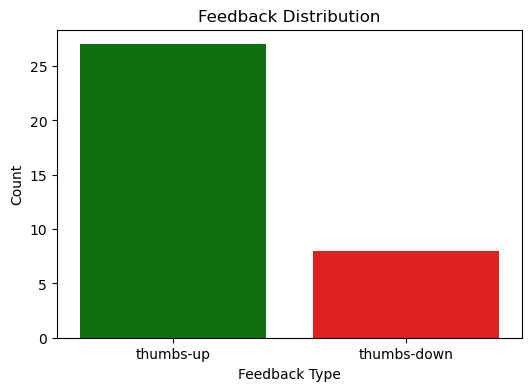

In [11]:

# ---- BAR GRAPH: 'thumbs-up' vs 'thumbs-down' ----
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="feedback_type", palette={"thumbs-up": "green", "thumbs-down": "red"})
plt.title("Feedback Distribution")
plt.xlabel("Feedback Type")
plt.ylabel("Count")
plt.show()

- Majority of the entries are positive (thumbs-up). Regardless, we should look into the negative (thumbs-down) to find any possible issues. We do so by looking further into the next column: `additional_feedback`

5. The next column of interest is the `additional_feedback`. We can give ourselves an idea of its contents by generating another word cloud.

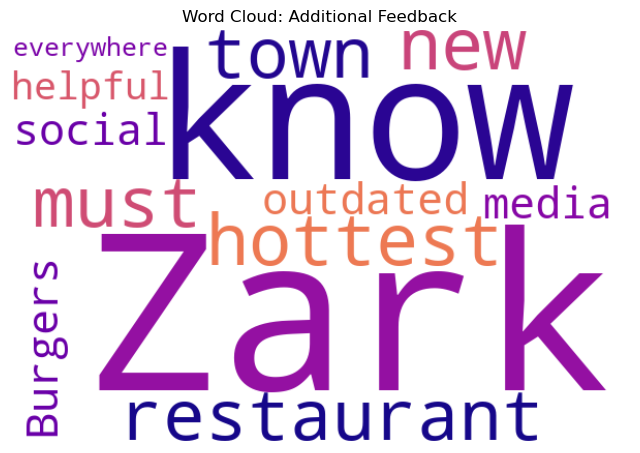

In [12]:
# ---- WORD CLOUD: ADDITIONAL FEEDBACK ----
plt.figure(figsize=(8, 6))

# Drop NaN entries
feedback_text = " ".join(df["additional_feedback"].dropna().astype(str))

wordcloud_feedback = WordCloud(width=600, height=400, background_color="white", colormap="plasma").generate(feedback_text)
plt.imshow(wordcloud_feedback, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Additional Feedback")
plt.show()

- We can see some recurring words that could be of interest, signaling possible gaps and improvements to be made. Given this, we can use further methods to further understand the data present here.

6. We start our further analysis of the `additional_feedback` by preprocessing its entries. Run the code below to use the nltk library and preprocess the column's data. 

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary resources from nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphanumeric characters
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    
    return " ".join(tokens)

# Apply preprocessing to each feedback entry
df_cleaned = df['additional_feedback'].dropna().apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diegomanzano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diegomanzano/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/diegomanzano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- Next, we apply n-gram analysis to identify common word pairs (bigrams) in the preprocessed feedback data. Run the following code to extract and display the most frequent bigrams. N-gram analysis is a natural language processing technique that examines contiguous sequences of n words in a text. For example, bigrams (n=2) look at word pairs, while trigrams (n=3) analyze sequences of three words. This approach helps identify common phrases, patterns, and recurring themes in textual data. In our case, n-grams can highlight frequently mentioned concerns, praise, or issues, providing valuable insights into customer sentiment and recurring topics.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a bigram model (you can change ngram_range for different n-grams)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df_cleaned)

# Get the most frequent n-grams
ngram_freq = X.toarray().sum(axis=0)
ngram_terms = vectorizer.get_feature_names_out()

# Create a DataFrame with n-grams and their frequencies
ngram_df = pd.DataFrame(list(zip(ngram_terms, ngram_freq)), columns=["Bigram", "Frequency"])
ngram_df = ngram_df.sort_values(by="Frequency", ascending=False)

# Display the top 10 most frequent n-grams
print(ngram_df.head(10))


            Bigram  Frequency
2        know zark          3
0    burger social          1
1      hottest new          1
3   new restaurant          1
4  restaurant town          1
5    social medium          1
6    town outdated          1
7      zark burger          1
8     zark hottest          1


- The bigram analysis of the `additonal_feedback` column suggests user frustration with the agent’s outdated knowledge, as seen in phrases like "know Zark" (3 occurrences) and "town outdated" (1 occurrence). The presence of "hottest new", "new restaurant", and "restaurant town" further supports the idea that users expect the agent to recognize trending establishments, indicating that the Virtual Agent's data may be out of date.

7. Now let's look more into the complete entries containing these bigrams in question.

In [22]:
import re

# Define the bigrams to search for (lowercase for consistency)
bigrams_to_check = [
    "know zark", "burger social", "hottest new", "new restaurant",
    "restaurant town", "social medium", "town outdated", "zark burger", "zark hottest"
]

# Function to check if any bigram appears in a text
def contains_bigram(text, bigrams):
    if isinstance(text, str):  # Ensure the input is a string
        text = text.lower()  # Normalize case
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        return any(bigram in text for bigram in bigrams)
    return False  # Return False for non-string values

# Apply the function to filter the dataframe
filtered_df = df[df['additional_feedback'].notna() & df['additional_feedback'].apply(lambda x: contains_bigram(x, bigrams_to_check))]

# Display the filtered entries
filtered_df


,id,prompt,response,feedback_type,additional_feedback,created_at
2,3,Do you have details about Zark's Burgers,"<p>I'm sorry, I don't have any information abo...",thumbs-down,Zark's is the hottest new restaurant in town t...,2025-02-27 13:32:21
3,4,Where is Zark's Burgers,"<p>I'm sorry, but I don't have the location of...",thumbs-down,How does it not know Zark's Burgers? It's all ...,2025-02-27 13:33:39
32,33,tell me about Zark's Burgers menu and reviews,"<p>I found one restaurant mentioning burgers, ...",thumbs-down,How does it not know Zark's it's everywhere,2025-02-27 16:02:36


- Our bigram analysis of negative feedback suggests that users are frustrated with the virtual agent’s outdated knowledge, particularly regarding Zark’s Burgers. Frequent mentions of "know Zark" and "town outdated" imply that users expect the agent to recognize popular establishments and reflect recent trends. Additionally, phrases like "burger social" and "social medium" suggest that users perceive social media as a relevant source of information, which the agent fails to utilize.

To improve the Virtual Agent, it could be considered to incorporate a self-learning mechanism that dynamically integrates real-time data from social media, restaurant databases, or user feedback. Additionally, implementing a system for regularly updating its knowledge base—whether through scheduled data refreshes or automated trend monitoring—would help ensure it stays relevant and accurately reflects current user expectations.